In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Creating a "3 or 7" Image Classifier 

Download a sample of MNIST that contains images of just these digits

assign unzipped data to path.
URLs provides methods that grab from a provided list of urls

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

Path class inherits from "Purepath" and can make system calls. Returns a posix or windows path

assign path to Path at BASE_PATH

In [5]:
Path.BASE_PATH = path

seeing what's inside with bash commands provided by fastai methods

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

two folders in path - 3's and 7's
assign each, using sorted provided by fastai

In [8]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

Show an image of a 7 from MNIST using image class from PIL

In [9]:
im7_path = sevens[3]
im7 = Image.open(im7_path)
im7

view the above image represented as a number
convert to numpy array and request rows from index 4 to index 10
and request columns from index 4 to index 10

In [10]:
array(im7)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  19],
       [  0,   0,   0,   0,  13, 144]], dtype=uint8)

Now the same for a pytorch tensor

In [11]:
tensor(im7)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  19],
        [  0,   0,   0,   0,  13, 144]], dtype=torch.uint8)

create a tensor object
slice and assign to dataframe
set font size and color

In [12]:
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,29,104,141,241,192,60,0,0,0,0
3,0,0,0,0,0,0,0,101,253,252,252,252,253,234,131,32,0,0
4,0,0,0,0,0,19,123,246,253,252,252,177,119,224,252,228,38,0
5,0,0,0,0,13,144,252,252,253,227,103,3,0,44,228,252,113,0
6,0,0,0,0,154,253,253,253,239,75,0,0,0,7,204,253,114,0
7,0,0,0,76,253,252,252,227,88,0,0,0,0,57,252,252,113,0
8,0,0,0,113,253,252,186,43,0,0,0,0,0,95,252,252,25,0
9,0,0,0,13,140,115,6,0,0,0,0,0,13,206,252,102,0,0


Create list of single image tensors, check length

In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

Check an image to make sure it looks correct

<AxesSubplot: >

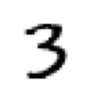

In [15]:
show_image(three_tensors[1])

Compute the average over all the images of the intensity at each pixel

To do this we have to combine all the image in the list
and create a *single 3 dimensional* tensor

Common description of a 3 dimensional tensor is a *rank-3 tensor*

This is a pretty common occurance, and pytorch has a function called
*stack* to do this.

Some operations like taking a mean require us to *cast* our integer types to float types.

In pytorch there is a method *.float()* that can be called to do this

Pixel values are expected to be between 0 and 1 so we can divide by 255 to get this value

In [16]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

*shape* is the most important attribute of a tensor. It tells you
the length of each axis. The above is saying there are 6131 images, each of size 28x28 pixels

nothing about the tensor specificallys says first is images, second is height in pixels, third is height in pixels. This is all up to us and how we construct it

The *length* of the tensor shape is it's *rank*

In [18]:
len(stacked_sevens.shape)

3

**Important Terms to Memorize** 
*Rank* - the number of axes or dimensions of a tensor
*Shape* - the size of each axis of a tensor

Dimension is used in a confusing way sometimes
A "3D" physical position can be described with vectors, but to pytorch,
the number of dimensions is == 1.

This is because even though it's 3 items long, it's still only one axis
Ex. "3 Dimensional"
Sometimes dimension is used for *size of axis* [1,2,3]
Sometimes it's used for *rank*  [1,2,3]
                                [1,2,3]
                                [1,2,3]

Describing in terms of **rank, axis, and length** are unambiguous

A tensor's rank can be obtained with `ndim`

In [19]:
stacked_threes.ndim

3